In [40]:
import pandas as pd
import getpass
from functions import connect_mysql, mysql_list

# Input User id
try:
    # password input hashed
    id = getpass.getpass("id: ") 
except Exception as ex:
    print('Error Occured : ', ex)
#Input password
try:
    # password input hashed
    pwd = getpass.getpass("password: ") 
except Exception as ex:
    print('Error Occured : ', ex)

#host for RDS connection
host = "mdsi-dsp-spr-2020.cehiwpryiego.ap-southeast-2.rds.amazonaws.com"
mydb = connect_mysql(host, id, pwd)

if mydb: 
    print("Connection Successful")
    mydb.close()

id: ········
password: ········
Connection Successful


In [41]:
from functions import mysql_list
mydb = connect_mysql(host, id, pwd)
mycursor = mydb.cursor()
mycursor.execute("SHOW DATABASES;")
# create a list of database
db_list = mysql_list(mycursor.fetchall())
print(db_list) 
# asx is the database to be used
db = "asx"
mydb.close()

['asx', 'information_schema', 'mysql', 'performance_schema']


In [42]:
mydb = connect_mysql(host, id, pwd, db)
mycursor = mydb.cursor()
mycursor.execute("SHOW TABLES;")
tb_list = mysql_list(mycursor.fetchall())
print(tb_list)
mydb.close()

['GDP_history_year', 'asx200', 'asx200_month', 'asx_all', 'asx_history', 'asx_s_and_p', 'cashrate', 'exchange_rate', 'national_net_lending', 'net_lending_borrowing', 's_and_p', 'unemployment_rate', 'vix']


In [43]:
from IPython.display import display, HTML
mydb = connect_mysql(host, id, pwd, db)

for tb in tb_list:
    df = pd.read_sql_query("SELECT * FROM %s LIMIT 100" % (tb), con=mydb)
    print(tb)
mydb.close()

GDP_history_year
asx200
asx200_month
asx_all
asx_history
asx_s_and_p
cashrate
exchange_rate
national_net_lending
net_lending_borrowing
s_and_p
unemployment_rate
vix


In [44]:
mydb = connect_mysql(host, id, pwd, db)
query =  \
"""
SELECT Code, Date, Close 
FROM asx_history
WHERE Code = 'AXJO' 
"""
asx_axjo = pd.read_sql_query(query, con=mydb)
asx_axjo["Date"]=  pd.to_datetime(asx_axjo["Date"])
mydb.close()

In [45]:
mydb = connect_mysql(host, id, pwd, db)
query =  \
"""
SELECT *
FROM exchange_rate

"""
exchange_rate= pd.read_sql_query(query, con=mydb)
exchange_rate["Date"]=  pd.to_datetime(exchange_rate["Date"])
print(exchange_rate)
mydb.close()

           Date      Rate
0    2010-10-01  0.964692
1    2010-10-02  0.971345
2    2010-10-03  0.973047
3    2010-10-04  0.971817
4    2010-10-05  0.966464
...         ...       ...
3616 2020-09-25  0.701745
3617 2020-09-26  0.702800
3618 2020-09-27  0.702800
3619 2020-09-28  0.706290
3620 2020-09-29  0.711930

[3621 rows x 2 columns]


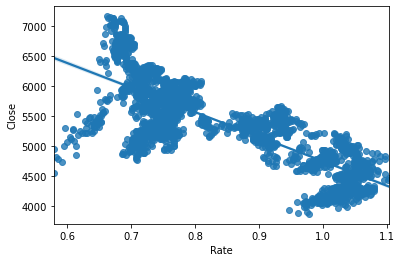

In [47]:
import seaborn as sns
df = asx_axjo.merge(exchange_rate, on = "Date", how = "right").dropna()

sns.regplot(data=df, x="Rate", y="Close")

In [82]:
ELECT *
FROM GDP_history_year

"""
exchange_rate= pd.read_sql_query(query, con=mydb)
# exchange_rate["Date"]=  pd.to_datetime(exchange_rate["Date"])

mydb.close()

In [106]:
asx_axjo.Close/1455


0       1.000000
1       1.002337
2       1.008866
3       1.002749
4       1.002680
          ...   
7050    4.214433
7051    4.258213
7052    4.246873
7053    4.268247
7054    4.245223
Name: Close, Length: 7055, dtype: float64

In [105]:
asx_axjo.set_index(['Code']).groupby(['Code'])['Close'].transform('first')

Code
AXJO    1455.0
AXJO    1455.0
AXJO    1455.0
AXJO    1455.0
AXJO    1455.0
         ...  
AXJO    1455.0
AXJO    1455.0
AXJO    1455.0
AXJO    1455.0
AXJO    1455.0
Name: Close, Length: 7055, dtype: float64

In [117]:
import numpy as np
np.divide(asx_axjo.Close.to_numpy(), asx_axjo.set_index(['Code']).groupby(['Code'])['Close'].transform('first').to_numpy())

array([1.        , 1.00233678, 1.00886599, ..., 4.24687299, 4.26824729,
       4.24522324])

In [133]:
asx_axjo.Close/ asx_axjo.set_index(['Code']).groupby(['Code'])['Close'].transform('first').reset_index()

TypeError: unsupported operand type(s) for /: 'float' and 'str'

In [143]:
mydb = connect_mysql(host, id, pwd, db)
query =  \
"""
SELECT Code, Date, Close
FROM asx_history

"""
df= pd.read_sql_query(query, con=mydb)
print(df)
mydb.close()

       Code        Date      Close
0       ABC  1988-01-29    1.70226
1       ALQ  1988-01-29    0.27083
2       AMC  1988-01-29    2.10952
3       ANN  1988-01-29   15.03350
4       ANZ  1988-01-29    3.20574
...     ...         ...        ...
828949  WPR  2020-10-16    2.70000
828950  WSA  2020-10-16    2.26000
828951  WTC  2020-10-16   27.77000
828952  XRO  2020-10-16  114.55000
828953  Z1P  2020-10-16    7.02000

[828954 rows x 3 columns]


In [157]:
df['Close_index'] =  (df.set_index(['Code']).Close/df.set_index(['Code']).groupby(['Code']).transform('first').Close).reset_index()['Close']

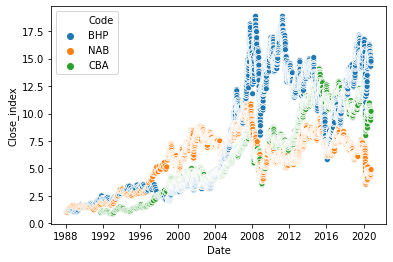

In [185]:
sns.scatterplot(data = df[df['Code'].isin(['CBA', 'BHP', 'NAB'])], x = "Date", y = "Close_index", hue = "Code")